Cargado de librerías

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
# Lo siguiente es sólo para el trabajo con colab:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [72]:
PATH_DIAG = 'data/diagnosticos_ns.csv'
PATH_MED = 'data/medicamentos_ns.csv'
PATH_MAIN = 'data/principal.csv'

Importamos las BDDs como dataframes:



In [73]:
diag_bdd = pd.read_csv(PATH_DIAG, sep=",")
med_bdd = pd.read_csv(PATH_MED, sep=",")
main_bdd = pd.read_csv(PATH_MAIN, sep=",")

Creamos la BDD global (con las tres bases unidas):

In [74]:
primer_join = main_bdd.merge(med_bdd, on="id ingreso", how='left')
bdd_completa = primer_join.merge(diag_bdd, on="id ingreso", how='left')

# Visualizamos las primeras 10 observaciones para todas las variables de la BDD:

In [75]:
bdd_completa.head(10).T

,0,1,2,3,4,5,6,7,8,9
id ingreso,35754,55842,12522,36900,40926,62256,73578,77076,89682,150006
id paciente_x,82637451,84259809,48330783,77391171,85504905,49726791,86328819,92519352,107389323,22864131
sexo,Hombre,Hombre,Mujer,Hombre,Mujer,Mujer,Hombre,Hombre,Hombre,Mujer
edad,[50-60),[60-70),[80-90),[60-70),[40-50),[60-70),[60-70),[50-60),[70-80),[50-60)
Tipo de Admisión,Urgencia,Otro tipo de Ingreso,Urgencia,Urgencia,Urgencia,Otro tipo de Ingreso,Urgencia,Urgencia,Urgencia,Urgencia
Días de estancia en primer ingreso,3,4,13,7,7,1,12,4,5,2
Tipo de alta,Hogar,Hogar,Hogar,Hogar,Transferido,Hogar,Transferido,Hogar,Hogar,Hogar
Especialidad médica,Especialidad Tipo_1,Especialidad Tipo_1,Especialidad Tipo_1,Especialidad Tipo_1,Especialidad Tipo_1,Especialidad Tipo_1,Especialidad Tipo_1,NaN,Especialidad Tipo_1,Especialidad Tipo_1
Cantidad de procedimientos de Laboratorio,31,70,68,62,60,49,75,45,35,66
Cantidad de procedimientos médicos,6,1,2,0,0,5,5,4,5,1


In [76]:
print(f'La base de datos posee un total de {bdd_completa.shape[0]} observaciones, y {bdd_completa.shape[1]} variables')

La base de datos posee un total de 50000 observaciones, y 44 variables


# Datos nulos

In [77]:
# Definimos una función capaz de describir los datos nulos por variables
def null_type(df):
  n = df.shape[0]; p = df.shape[1]
  variables = list(df.columns)
  nulldata = list(df.isna().sum())
  out = pd.DataFrame({'Variables': variables, 'Cantidad de datos nulos': nulldata})
  out['Proporción de datos nulos'] = out['Cantidad de datos nulos']/n
  return out[out['Proporción de datos nulos']>0]

In [78]:
null_type(bdd_completa)

,Variables,Cantidad de datos nulos,Proporción de datos nulos
2,sexo,1,0.00002
4,Tipo de Admisión,2790,0.05580
6,Tipo de alta,1870,0.03740
7,Especialidad médica,27207,0.54414
40,Diagnostico principal,11,0.00022
41,Diagnostico secundario,184,0.00368


Debemos trabajar los datos nulos:


## Variable Sexo

In [79]:
bdd_completa['sexo'].describe()

count     49999
unique        2
top       Mujer
freq      26869
Name: sexo, dtype: object

In [80]:
print(f"Las variables únicas son: {bdd_completa['sexo'].unique()}")

Las variables únicas son: ['Hombre' 'Mujer' nan]


Consideraremos que el sexo corresponde al sexo biológico, luego como es un sólo dato nulo, podemos reemplazar el valor nulo por la moda:

In [81]:
bdd_completa.loc[bdd_completa['sexo'].isna(), 'sexo'] = bdd_completa['sexo'].mode()[0]

## Variable Tipo de Admisión

In [82]:
bdd_completa['Tipo de Admisión'].describe()

count        47210
unique           2
top       Urgencia
freq         35702
Name: Tipo de Admisión, dtype: object

In [83]:
print(f"Las variables únicas son: {bdd_completa['Tipo de Admisión'].unique()}")

Las variables únicas son: ['Urgencia' 'Otro tipo de Ingreso' nan]


Eliminamos las observaciones nulas:

In [84]:
null_index = bdd_completa['Tipo de Admisión'].loc[bdd_completa['Tipo de Admisión'].isna(),].index.values
bdd_completa.drop(null_index, inplace=True)

## Variable Tipo de alta

In [85]:
bdd_completa['Tipo de alta'].describe()

count     45346
unique        2
top       Hogar
freq      33823
Name: Tipo de alta, dtype: object

In [86]:
print(f"Las variables únicas son: {bdd_completa['Tipo de alta'].unique()}")

Las variables únicas son: ['Hogar' 'Transferido' nan]


Como equivale al 4% de los datos totales, podemos eliminar:

In [87]:
null_index = bdd_completa['Tipo de alta'].loc[bdd_completa['Tipo de alta'].isna(),].index.values
bdd_completa.drop(null_index, inplace=True)

## Especialidad médica

In [88]:
bdd_completa['Especialidad médica'].describe()

count                   19197
unique                     60
top       Especialidad Tipo_1
freq                    10556
Name: Especialidad médica, dtype: object

In [89]:
print(f"Las variables únicas son: {bdd_completa['Especialidad médica'].unique()}")

Las variables únicas son: ['Especialidad Tipo_1' nan 'Especialidad Tipo_3' 'Especialidad Tipo_4'
 'Especialidad Tipo_10' 'Especialidad Tipo_5' 'Especialidad Tipo_12'
 'Especialidad Tipo_14' 'Especialidad Tipo_7' 'Especialidad Tipo_16'
 'Especialidad Tipo_25' 'Especialidad Tipo_27' 'Especialidad Tipo_28'
 'Especialidad Tipo_9' 'Especialidad Tipo_20' 'Especialidad Tipo_19'
 'Especialidad Tipo_21' 'Especialidad Tipo_24' 'Especialidad Tipo_23'
 'Especialidad Tipo_30' 'Especialidad Tipo_32' 'Especialidad Tipo_26'
 'Especialidad Tipo_34' 'Especialidad Tipo_15' 'Especialidad Tipo_22'
 'Especialidad Tipo_35' 'Especialidad Tipo_13' 'Especialidad Tipo_8'
 'Especialidad Tipo_36' 'Especialidad Tipo_18' 'Especialidad Tipo_37'
 'Especialidad Tipo_17' 'Especialidad Tipo_6' 'Especialidad Tipo_38'
 'Especialidad Tipo_39' 'Especialidad Tipo_40' 'Especialidad Tipo_11'
 'Especialidad Tipo_42' 'Especialidad Tipo_29' 'Especialidad Tipo_43'
 'Especialidad Tipo_44' 'Especialidad Tipo_45' 'Especialidad Tipo_50

Notamos que corresponde a una variable categórica, indicando el tipo de especialidad. ¿Sabemos si están todas las especialidades?

In [90]:
# Comprobamos que estén todas las especialidades. Asumimos un máximo de 100 especialidades:
for i in range(60,101):
  inner_val = f'Especialidad Tipo_{i}'
  if inner_val not in list(bdd_completa['Especialidad médica'].unique()):
    print(f"La {inner_val} no se encuentra en la BDD")

La Especialidad Tipo_60 no se encuentra en la BDD
La Especialidad Tipo_65 no se encuentra en la BDD
La Especialidad Tipo_68 no se encuentra en la BDD
La Especialidad Tipo_69 no se encuentra en la BDD
La Especialidad Tipo_70 no se encuentra en la BDD
La Especialidad Tipo_71 no se encuentra en la BDD
La Especialidad Tipo_72 no se encuentra en la BDD
La Especialidad Tipo_73 no se encuentra en la BDD
La Especialidad Tipo_74 no se encuentra en la BDD
La Especialidad Tipo_75 no se encuentra en la BDD
La Especialidad Tipo_76 no se encuentra en la BDD
La Especialidad Tipo_77 no se encuentra en la BDD
La Especialidad Tipo_78 no se encuentra en la BDD
La Especialidad Tipo_79 no se encuentra en la BDD
La Especialidad Tipo_80 no se encuentra en la BDD
La Especialidad Tipo_81 no se encuentra en la BDD
La Especialidad Tipo_82 no se encuentra en la BDD
La Especialidad Tipo_83 no se encuentra en la BDD
La Especialidad Tipo_84 no se encuentra en la BDD
La Especialidad Tipo_85 no se encuentra en la BDD


Como desde la especialidad 68 a la 100 no se encuentra en la BDD, podemos asumir que existe un máximo de 67 especialidades.

In [91]:
for i in range(1,68):
  inner_val = f'Especialidad Tipo_{i}'
  if inner_val not in list(bdd_completa['Especialidad médica'].unique()):
    print(f"La {inner_val} no se encuentra en la BDD")

La Especialidad Tipo_2 no se encuentra en la BDD
La Especialidad Tipo_31 no se encuentra en la BDD
La Especialidad Tipo_33 no se encuentra en la BDD
La Especialidad Tipo_46 no se encuentra en la BDD
La Especialidad Tipo_47 no se encuentra en la BDD
La Especialidad Tipo_60 no se encuentra en la BDD
La Especialidad Tipo_65 no se encuentra en la BDD


A su vez, notamos que hay 7 tipos de especialidades que no se encuentran en la BDD. Por ello, no podemos usar la tendencia de los datos para rellenarlos, pues podría producir un sesgo sin conocer la distribución de ocurrencia en las especialidades. Así, decidimos eliminar la variable por completo.

In [92]:
bdd_completa.drop('Especialidad médica', inplace=True, axis=1)

## Variable diagnóstico principal

In [93]:
bdd_completa['Diagnostico principal'].describe()

count     45336
unique      641
top         428
freq       3147
Name: Diagnostico principal, dtype: object

In [94]:
print(f"Las variables únicas son: {bdd_completa['Diagnostico principal'].unique()}")

Las variables únicas son: ['414' '398' '157' '428' '518' '999' '410' '402' '189' '786' '277' '584'
 '473' 'V57' '432' '626' '295' '196' '998' '250.6' '182' '250.4' '722'
 '250.7' '707' '151' '715' '427' '564' '996' '997' '403' '38' '486' '411'
 '250.32' '433' 'V58' '569' '185' '434' '250.13' '250.8' '296' '446' '780'
 '560' '514' '789' '162' '711' '202' '386' '200' '507' '198' '787'
 '250.22' '530' '276' '491' '571' '220' '516' '922' '562' '572' '661'
 '824' '191' '416' '535' '648' '599' '286' '440' '435' '250.82' '721'
 '558' '511' '593' '188' '550' '54' '351' '401' '493' '250.02' '577'
 '250.12' '733' '424' '596' '241' '331' '575' '250.01' '574' '453' '820'
 '250.03' '158' '309' '799' '682' '250.42' '482' '280' '730' '532' '458'
 '531' '455' '293' '852' '591' '723' '250.41' '311' '436' '250.11' '153'
 '278' '598' '592' '553' '154' '552' '557' '285' '808' '284' '579' '708'
 '590' '415' '595' '578' '437' '727' '250.81' '756' '618' '805' '782' '8'
 '426' '812' '429' '288' '522' '78' '99

Dado que son solamente 11 datos (menos del 1% de datos totales) y como las variables son categóricas, una buena decisión es utilizar la moda de las variables. Pudiendo evitar un sesgo, y dado que la cantidad de datos nulos es tan ínfima, decidimos eliminar las observaciones con datos nulos.

In [95]:
null_index = bdd_completa['Diagnostico principal'].loc[bdd_completa['Diagnostico principal'].isna(),].index.values
bdd_completa.drop(null_index, inplace=True)

## Variable Diagnostico secundario

In [96]:
bdd_completa['Diagnostico secundario'].describe()

count     45161
unique      635
top         276
freq       3070
Name: Diagnostico secundario, dtype: object

In [97]:
print(f"Las variables únicas son: {bdd_completa['Diagnostico secundario'].unique()}")

Las variables únicas son: ['411' '427' '288' '250.43' '998' '507' '425' '496' '401' '250.02' '996'
 '276' '997' '250.01' '599' '198' '553' '707' '286' 'V45' '357' '440'
 '424' '428' '196' '414' '250' '577' '535' '413' '491' '511' '518' '150'
 '566' '250.6' '410' 'V15' '786' '560' '277' '781' '250.42' '426' '403'
 '759' '41' '250.03' '398' '203' '788' '250.51' '162' '571' '780' '787'
 '117' '154' '847' '733' '287' '729' '573' '648' 'V42' '250.41' '785'
 '492' '493' '300' '790' '250.83' '250.82' '283' '250.81' '536' '591'
 '292' '285' '574' nan '53' '682' '295' '204' '789' '466' '569' '584'
 '305' '590' '486' '572' '250.5' '258' '515' '250.52' '157' '112' '284'
 '290' '250.92' '567' '179' '537' '205' '405' '293' '197' '530' '437'
 '784' '309' '263' '250.7' '38' '202' '201' '242' '342' '723' '280' '614'
 '568' '578' '861' '711' '434' '250.12' '135' '250.4' '575' '297' '255'
 '724' '444' '250.13' 'E888' '278' '303' '451' '805' '482' '218' '244'
 '722' '958' '358' '585' '250.11' '250.91' '2

Comportamiento parecido a diagnóstico principal. Como la proporción también es ínfima, eliminamos las filas con datos nulos.

In [98]:
null_index = bdd_completa['Diagnostico secundario'].loc[bdd_completa['Diagnostico secundario'].isna(),].index.values
bdd_completa.drop(null_index, inplace=True)

## Base sin datos nulos

Podemos notar que ahora eliminamos los datos nulos:

In [99]:
null_type(bdd_completa)

,Variables,Cantidad de datos nulos,Proporción de datos nulos


In [100]:
print(f"Finalmente nos quedamos con un total de {bdd_completa.shape[0]} observaciones y {bdd_completa.shape[1]} variables")

Finalmente nos quedamos con un total de 45161 observaciones y 43 variables


# Metodología

Lo que haremos: Como pueden existir muchas coincidencias con los grupos de readmitidos, trataremos los 3 grupos de readmisión en conjunto hasta el final, luego haremos un ensamblaje.

In [101]:
# Creamos una copia de la BDD completa
df1 = bdd_completa.copy()

Por lo tanto, tenemos que en esta nueva BDD, las readmisiones en otra proporción

In [102]:
print(f"Existe un total de {list(df1['Readmisión']).count('Sin Readmision')} pacientes no readmitidos ({100*list(df1['Readmisión']).count('Sin Readmision')/len(list(df1['Readmisión']))}% del total)")
print(f"Existe un total de {list(df1['Readmisión']).count('Con Readmisión >30')} pacientes readmitidos en más de 30 días ({100*list(df1['Readmisión']).count('Con Readmisión >30')/len(list(df1['Readmisión']))}% del total)")
print(f"Existe un total de {list(df1['Readmisión']).count('Con Readmisión <30')} pacientes readmitidos en menos de 30 días ({100*list(df1['Readmisión']).count('Con Readmisión <30')/len(list(df1['Readmisión']))}% del total)")

Existe un total de 20864 pacientes no readmitidos (46.199154137419455% del total)
Existe un total de 14043 pacientes readmitidos en más de 30 días (31.095414184805474% del total)
Existe un total de 10254 pacientes readmitidos en menos de 30 días (22.70543167777507% del total)


# Transformación de variables

¿Nos interesa realmente el id de ingreso y el id del paciente? La respuesta es no, por lo que debemos eliminarlos directamente de la base de datos.

In [103]:
df1.drop('id ingreso', inplace=True, axis=1)
df1.drop('id paciente_x', inplace=True, axis=1)
df1.drop('id paciente_y', inplace=True, axis=1)
df1.drop('id paciente', inplace=True, axis=1)

Posteriormente, trabajamos las variables según lo que nos interese, es decir, todas en numéricas!

In [104]:
print(f"Tenemos las siguientes variables: {list(df1.columns)}")

Tenemos las siguientes variables: ['sexo', 'edad', 'Tipo de Admisión', 'Días de estancia en primer ingreso', 'Tipo de alta', 'Cantidad de procedimientos de Laboratorio', 'Cantidad de procedimientos médicos', 'Cantidad de medicamentos', 'Ingresos a Urgencias', 'Visitas al Hospital', 'Readmisión', 'Insulina', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed', 'Diagnostico principal', 'Diagnostico secundario', 'Cantidad de diagnosticos', 'Comorbilidades']


In [105]:
# Transformamos las variables categóricas:

# Sexo: Definimos 0 como hombre, y 1 como mujer:
df1.loc[df1['sexo'] == 'Hombre', 'sexo'] = 0
df1.loc[df1['sexo'] == 'Mujer', 'sexo'] = 1

# Medicamentos: Utilizamos one hot encoding
for med in df1.columns[[i for i in range(11,35)]]:
    coded_med = pd.get_dummies(df1[med], drop_first=True, prefix=med)
    df1 = pd.concat([df1, coded_med], axis=1)

# Eliminamos los medicamentos como tal:
df1.drop(df1.columns[[i for i in range(11,35)]], axis=1, inplace=True)

# Edad: Utilizamos one hot encoding:
# Importante utilizar drop_first=True, para que no exista correlación entre las variables:
coded_age = pd.get_dummies(df1['edad'], drop_first=True)
df1 = pd.concat([df1, coded_age], axis=1)
df1.drop('edad', axis=1, inplace=True)

# Tipo de Admisión: Definimos 0 para Otro tipo de Ingreso, y 1 para Urgencias:
df1.loc[df1['Tipo de Admisión'] == 'Otro tipo de Ingreso', 'Tipo de Admisión'] = 0
df1.loc[df1['Tipo de Admisión'] == 'Urgencia', 'Tipo de Admisión'] = 1

# Tipo de alta: Definimos 0 para Hogar, y 1 para Transferido
df1.loc[df1['Tipo de alta'] == 'Hogar', 'Tipo de alta'] = 0
df1.loc[df1['Tipo de alta'] == 'Transferido', 'Tipo de alta'] = 1

# Readmisión:
# 0: No readmitidos
# 1: Readmitidos >30 días
# 2: Readmitidos <30 días
df1.loc[df1['Readmisión'] == 'Sin Readmision', 'Readmisión'] = 0
df1.loc[df1['Readmisión'] == 'Con Readmisión >30', 'Readmisión'] = 1
df1.loc[df1['Readmisión'] == 'Con Readmisión <30', 'Readmisión'] = 2

In [106]:
print(f"Finalmente nos quedamos con un total de {df1.shape[0]} observaciones y {df1.shape[1]} variables")

Finalmente nos quedamos con un total de 45161 observaciones y 67 variables


Posterior a ello, realizamos un *hot encoding* en Diagnósticos (porque tienen muchas categorías). El procedimiento es el siguiente:
1. Creamos funciones que nos permitan calcular el porcentaje de apariciones en una columna.

In [107]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

def porcentaje(database, string):
  """
  Retorna el porcentaje
  """
  valores = database[string].value_counts()
  opciones_sorted = list(valores.keys())
  dictionary = {"resultado" : opciones_sorted}
  porcentajes = zerolistmaker(len(opciones_sorted))
  total = 0
  for i in range(0, len(opciones_sorted)):
    total += valores[opciones_sorted[i]]
  for i in range(len(opciones_sorted)):
    actual = opciones_sorted[i]
    cantidad = valores[actual]
    porcentajes[i] = round(cantidad/total * 100, 3)
  dictionary["Porcentajes"] = porcentajes
  df = pd.DataFrame(dictionary)
  return df

2. Generamos en orden los diagnósticos principales y secundarios, con sus respectivos porcentajes

In [108]:
df2 = porcentaje(df1, 'Diagnostico principal')
df3 = porcentaje(df1, 'Diagnostico secundario')
df3.head(5)

,resultado,Porcentajes
0,276,6.798
1,428,6.592
2,250,5.682
3,427,4.956
4,401,3.397


In [109]:
df2.head(5)

,resultado,Porcentajes
0,428,6.968
1,414,6.049
2,786,3.545
3,486,3.450
4,410,3.359


3. Definimos los porcentajes de corte, equivalente a 75%

In [110]:
suma = 0
lista_principal = []
lista_secundaria = []

for ind in df2.index:
    actual = df2["resultado"][ind]
    suma += df2["Porcentajes"][ind]
    if suma < 75:
      pass
    else:
      lista_principal.append(df2["resultado"][ind])

suma = 0
for ind in df3.index:
    actual = df3["resultado"][ind]
    suma += df3["Porcentajes"][ind]
    if suma < 75:
      pass
    else:
      lista_secundaria.append(df3["resultado"][ind])

4. Cambiamos aquellos elementos que queden fuera del 75% por "otro".

In [111]:
df1.loc[df1['Diagnostico principal'].isin(lista_principal), 'Diagnostico principal'] = "Otro"
df1.loc[df1['Diagnostico secundario'].isin(lista_secundaria), 'Diagnostico secundario'] = "Otro"

5. Realizamos el hot encoding

In [112]:
Diag = df1['Diagnostico principal']
Diag2 = pd.get_dummies(Diag, prefix="DP", drop_first=True)
Diag = df1['Diagnostico secundario']
Diag3 = pd.get_dummies(Diag, prefix="DS", drop_first=True)

6. Concatenamos los DF y eliminamos las variables de diagnóstico principal y secundario

In [113]:
df1.drop(['Diagnostico principal', 'Diagnostico secundario'], axis=1, inplace=True)

In [114]:
df1 = pd.concat([df1, Diag2, Diag3], axis=1)

Nos quedaría entonces la siguiente BDD:

In [115]:
df1.head(10).T

,0,1,2,3,4,5,6,7,8,9
sexo,0,0,1,0,1,1,0,0,0,1
Tipo de Admisión,1,0,1,1,1,0,1,1,1,1
Días de estancia en primer ingreso,3,4,13,7,7,1,12,4,5,2
Tipo de alta,0,0,0,0,1,0,1,0,0,0
Cantidad de procedimientos de Laboratorio,31,70,68,62,60,49,75,45,35,66
...,...,...,...,...,...,...,...,...,...,...
DS_996,0,0,0,0,0,0,0,0,0,0
DS_997,0,0,0,0,0,0,0,0,0,0
DS_998,0,0,0,0,0,1,0,0,0,0
DS_Otro,0,0,0,1,1,0,1,0,0,0


## Matriz de correlación:

In [116]:
tabla_oficial = df1.copy()  # Definimos una tabla sólo con las variables numéricas

# Definimos las variables no binarias:
binary_c = tabla_oficial.columns[tabla_oficial.isin([0,1]).all()]
non_binary_cc = list(set(tabla_oficial.columns) - set(binary_c))

tabla_oficial.drop(binary_c, inplace=True, axis=1)
tabla_oficial.head(5).T

,0,1,2,3,4
Días de estancia en primer ingreso,3,4,13,7,7
Cantidad de procedimientos de Laboratorio,31,70,68,62,60
Cantidad de procedimientos médicos,6,1,2,0,0
Cantidad de medicamentos,16,21,28,11,15
Ingresos a Urgencias,0,0,0,0,1
Visitas al Hospital,0,0,0,0,0
Readmisión,1,0,0,2,2
Cantidad de diagnosticos,9,7,8,7,8
Comorbilidades,2,4,0,4,1


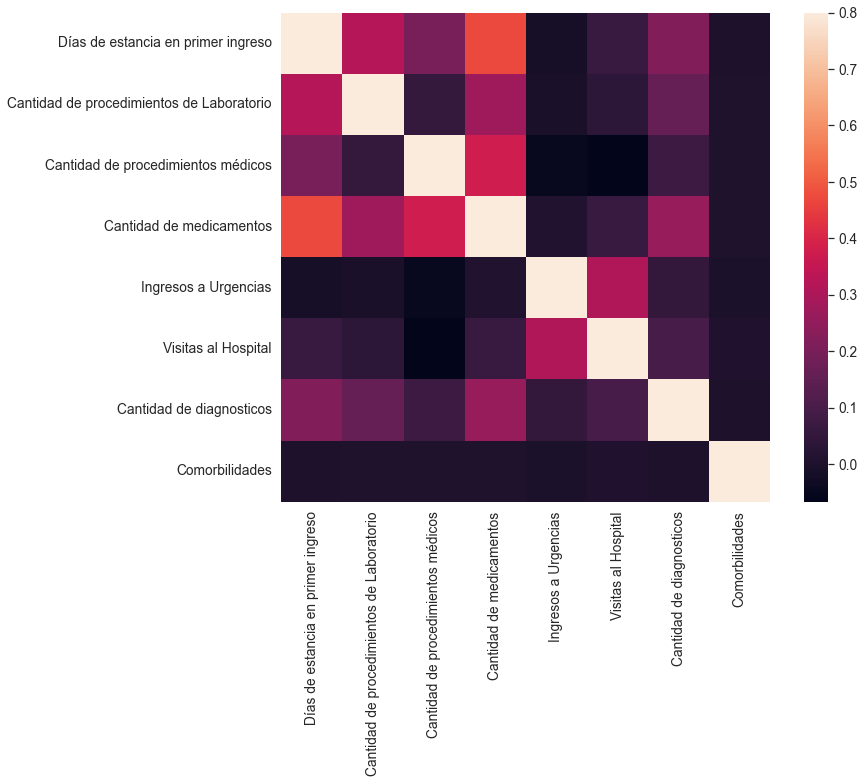

In [117]:
# Matriz de correlación
corrmat = tabla_oficial.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

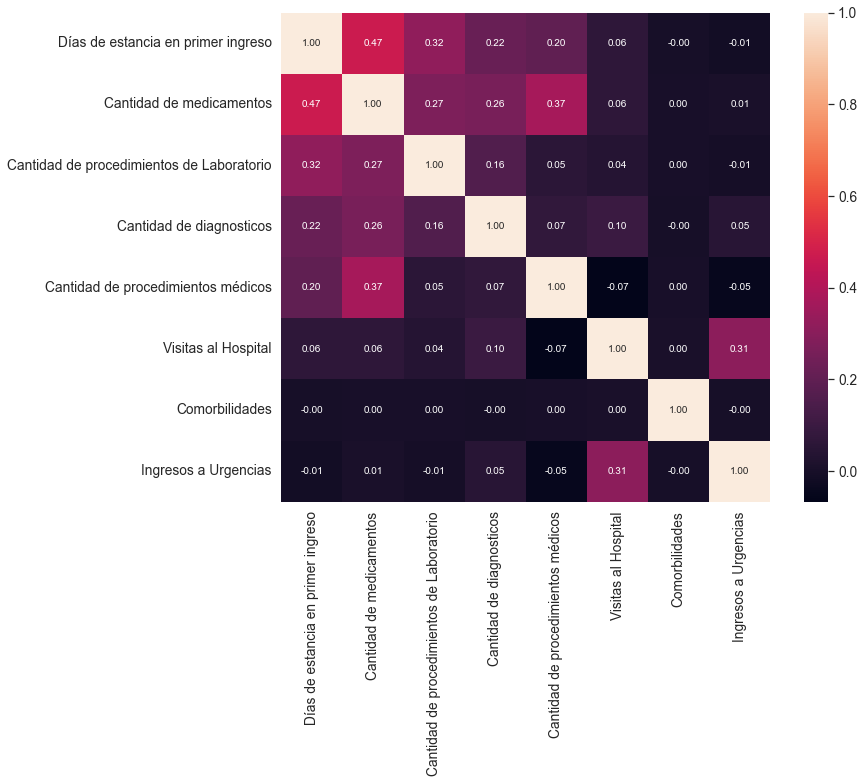

In [118]:
# Matriz de correlación de la readmisión
k = len(tabla_oficial.columns)
cols = corrmat.nlargest(k, 'Días de estancia en primer ingreso')['Días de estancia en primer ingreso'].index
cm = np.corrcoef(tabla_oficial[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Utilizamos como threshold el valor de 0.3

In [119]:
corr = tabla_oficial.corr()
related = []
for column in list(corr.columns):
  vars = list(corr[abs(corr[corr.columns])>0.3][column].dropna().index)
  for rel in vars:
    if rel != column:
      related.append(list(set([rel, column])))

named = []
for rel in related:
  if rel not in named:
    print(f"La variable {rel[0]} tiene una correlación mayor a 0.3 con la variable {rel[1]}")
    named.append(rel)

La variable Días de estancia en primer ingreso tiene una correlación mayor a 0.3 con la variable Cantidad de procedimientos de Laboratorio
La variable Días de estancia en primer ingreso tiene una correlación mayor a 0.3 con la variable Cantidad de medicamentos
La variable Cantidad de procedimientos médicos tiene una correlación mayor a 0.3 con la variable Cantidad de medicamentos
La variable Cantidad de medicamentos tiene una correlación mayor a 0.3 con la variable Cantidad de procedimientos médicos
La variable Ingresos a Urgencias tiene una correlación mayor a 0.3 con la variable Visitas al Hospital
La variable Visitas al Hospital tiene una correlación mayor a 0.3 con la variable Ingresos a Urgencias


In [120]:
print(f"La dev. estandar de la Cantidad de procedimientos de Laboratorio es {np.std(df1['Cantidad de procedimientos de Laboratorio'])}")
print(f"La media de la Cantidad de procedimientos de Laboratorio es {np.mean(df1['Cantidad de procedimientos de Laboratorio'])}")
print(f"La dev. estandar de la Días de estancia en primer ingreso es {np.std(df1['Días de estancia en primer ingreso'])}")
print(f"La media de la Días de estancia en primer ingreso es {np.mean(df1['Días de estancia en primer ingreso'])}")

La dev. estandar de la Cantidad de procedimientos de Laboratorio es 19.70783244974173
La media de la Cantidad de procedimientos de Laboratorio es 42.763867053431056
La dev. estandar de la Días de estancia en primer ingreso es 2.966831627894454
La media de la Días de estancia en primer ingreso es 4.406944044640287


Podemos notar que la cantidad de procedimientos de Laboratorio tiene mucha varianza entre sus números, mientras que los Dias de estancia no tanta

In [121]:
print(f"La dev. estandar de la Ingresos a Urgencias es {np.std(df1['Ingresos a Urgencias'])}")
print(f"La media de la Ingresos a Urgencias es {np.mean(df1['Ingresos a Urgencias'])}")
print(f"La dev. estandar de la Visitas al Hospital es {np.std(df1['Visitas al Hospital'])}")
print(f"La media de la Visitas al Hospital es {np.mean(df1['Visitas al Hospital'])}")

La dev. estandar de la Ingresos a Urgencias es 0.9678012449370198
La media de la Ingresos a Urgencias es 0.22949004672172893
La dev. estandar de la Visitas al Hospital es 1.3985456939871204
La media de la Visitas al Hospital es 0.7167910365138062


En este caso, las varianzas son muy parecidas

# Outliers

Primero revisaremos si tenemos outliers en nuestra BDD. Para ello, consideramos solamente las variables que son no-binarias, ya que ellas pueden presentar outliers interpretables.

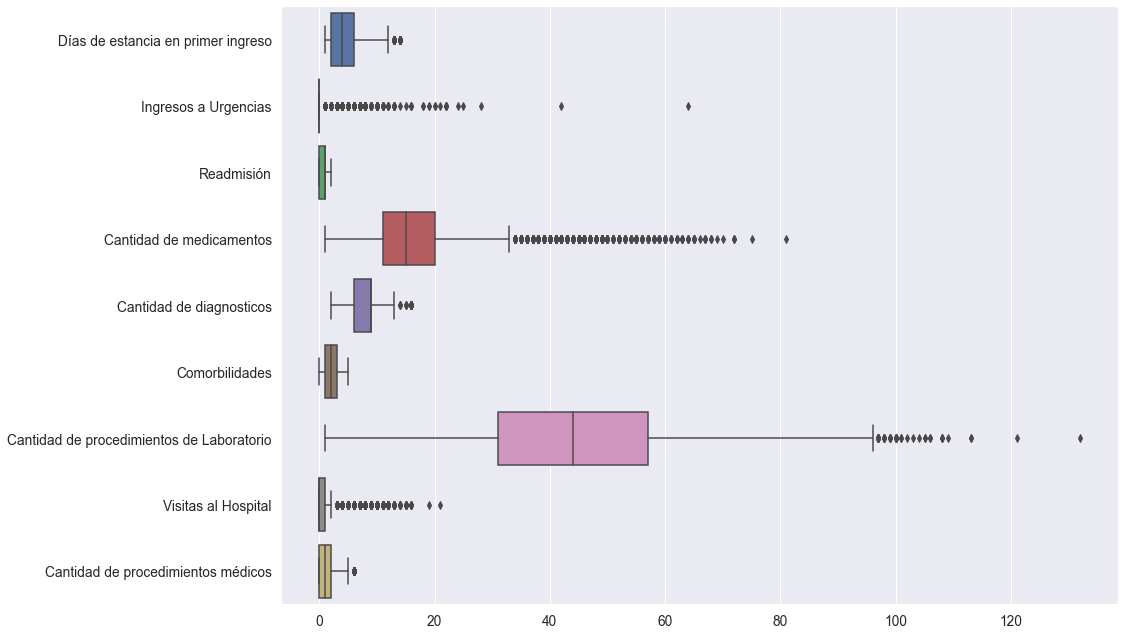

In [122]:
f, ax = plt.subplots(figsize=(15, 11))
sns.boxplot(data=df1[non_binary_cc], orient="h")
plt.show()

Podemos notar:
* En visitas al hospital tenemos muchos outliers
* En cantidad de medicamentos tenemos muchos outliers
* En Comorbilidades, sin embargo, no tenemos outliers
* En cantidad de diagnósticos existen considerables datos atípicos
* En Cantidad de procedimientos medicos también hay pocos datos atípicos
* En días de estancia también hay pocos outliers
* En cantidad de procedimientos de laboratorio hay muchísimos outliers
* En edad hay pocos outliers

In [123]:
def is_outlier(df):
  """
  Genera una BDD que en cada entrada indica si el dato es o no un outlier
  """
  out_df = df.copy()
  for var in out_df.columns:
    if len(list(out_df[var].value_counts())) <= 2:
      out_df.drop(columns=var, inplace=True)
    else:
      # Primer cuartil
      q1 = np.quantile(out_df[var], 0.25)
 
      # Tercer cuartil
      q3 = np.quantile(out_df[var], 0.75)
      med = np.median(out_df[var])  # Mediana
    
      # Rango intercuartil
      iqr = q3-q1
    
      # Upper and Lower bounds
      upper_bound = q3+(1.5*iqr)
      lower_bound = q1-(1.5*iqr)

      out_df[var] = (out_df[var] < lower_bound) | (out_df[var] > upper_bound)
  return out_df

In [124]:
def atipic_in_variables(df, need):
  n = df1.shape[0]
  atipic_return = []
  for var in df.loc[need].columns:
    if len(list(df.loc[need][var].value_counts())) > 1:
      atipic_return.append(df.loc[need][var].value_counts()[1])
    else:
      atipic_return.append(0)

  reurned_with_percentage = [str(i) + "   " + "(" + str(np.round(i/n*100, decimals=3)) + "%)" for i in atipic_return]
  return reurned_with_percentage

In [125]:
# Definimos una BDD que nos diga donde hay outliers:
z_df1 = is_outlier(df1)

# Identificamos los índices donde hay datos atípicos
read_no = df1[df1['Readmisión'] == 0].index
read_si_MAS_30 = df1[df1['Readmisión'] == 1].index
read_si_MENOS_30 = df1[df1['Readmisión'] == 2].index

# Ahora revisaremos outliers por variables:
atipic_no = atipic_in_variables(z_df1, read_no)

atipic_si_MAS_30 = atipic_in_variables(z_df1, read_si_MAS_30)

atipic_si_MENOS_30 = atipic_in_variables(z_df1, read_si_MENOS_30)

atipic = []
for var in z_df1.columns:
  if len(list(z_df1[var].value_counts())) > 1:
    atipic.append(z_df1[var].value_counts()[1])
  else:
    atipic.append(0)

printed_df = pd.DataFrame({'Variables': z_df1.columns,
                           'Cantidad de datos atípicos': atipic,
                           'Datos atípicos en No Readmitidos': atipic_no,
                           'Datos atípicos en Readmitidos >30': atipic_si_MAS_30,
                           'Datos atípicos en Readmitidos <30': atipic_si_MENOS_30})
printed_df

,Variables,Cantidad de datos atípicos,Datos atípicos en No Readmitidos,Datos atípicos en Readmitidos >30,Datos atípicos en Readmitidos <30
0,Días de estancia en primer ingreso,975,413 (0.915%),319 (0.706%),243 (0.538%)
1,Cantidad de procedimientos de Laboratorio,50,30 (0.066%),10 (0.022%),10 (0.022%)
2,Cantidad de procedimientos médicos,2086,1052 (2.329%),609 (1.349%),425 (0.941%)
3,Cantidad de medicamentos,1485,755 (1.672%),356 (0.788%),374 (0.828%)
4,Ingresos a Urgencias,5710,1684 (3.729%),2217 (4.909%),1809 (4.006%)
5,Visitas al Hospital,3665,686 (1.519%),1346 (2.98%),1633 (3.616%)
6,Readmisión,0,0 (0.0%),0 (0.0%),0 (0.0%)
7,Cantidad de diagnosticos,30,13 (0.029%),10 (0.022%),7 (0.016%)
8,Comorbilidades,0,0 (0.0%),0 (0.0%),0 (0.0%)


Podemos notar:
* Los días de estancia en primer ingreso si explica una gran diferencia entre readmisiones.
* La cantidad de procedimientos de laboratorio si explica una gran diferencia entre readmisiones.
* En cantidad de procedimientos médicos si explica una gran diferencia entre readmisiones.
* Cantidad de medicamentos si explica una gran diferencia entre readmisiones
* En ingresos a urgencias no ocurre eso, podría explicar mejor el outlier.
* En Visitas al hospital es la contra-variable de ingresos a urgencias. ¿Con cual quedarnos? Nos quedamos con Ingresos a urgencias porque tiene mejor capacidad de predicción que cantidad de diagnósticos (los outliers puede que expliquen la diferencia).
* En cantidad de diagnósticos existen demasiados valores para no readmitidos, luego debemos mantener los outliers.

Conclusión:
**Eliminamos**:
* Días de estancia en primer ingreso: Respecto a la cantidad de medicamentos, tiene menos outliers.
* Cantidad de procedimientos médicos: Arrastre
* Visitas al hospital

In [126]:
# Eliminamos las visitas al hospital
df1.drop(['Ingresos a Urgencias', 'Cantidad de procedimientos de Laboratorio', 'Cantidad de medicamentos'], axis=1, inplace=True)

In [127]:
# Identificamos los índices donde hay datos atípicos
atipic_age_index = z_df1[z_df1['Cantidad de diagnosticos'] == True].index
atipic_ding_index = z_df1[z_df1['Días de estancia en primer ingreso'] == True].index
atipic_cpm_index = z_df1[z_df1['Cantidad de procedimientos médicos'] == True].index
atipic_vhos_index = z_df1[z_df1['Visitas al Hospital'] == True].index
indexes = list(set(list(atipic_age_index) + list(atipic_ding_index) + list(atipic_cpm_index) + list(atipic_vhos_index)))

# Eliminamos las observaciones con datos atípicos:
df1.drop(indexes, inplace=True)

In [128]:
# Transformamos las variables a numéricas:
df1 = df1.astype(float)

Finalmente, nuestra base de datos quedaría:

In [129]:
df1.head(10).T

,1,3,4,5,6,7,8,9,10,11
sexo,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Tipo de Admisión,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
Días de estancia en primer ingreso,4.0,7.0,7.0,1.0,12.0,4.0,5.0,2.0,3.0,1.0
Tipo de alta,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Cantidad de procedimientos médicos,1.0,0.0,0.0,5.0,5.0,4.0,5.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
DS_996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS_997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS_998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DS_Otro,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [130]:
print(f"La base de datos final posee {df1.shape[0]} observaciones y {df1.shape[1]} variables")

La base de datos final posee 38710 observaciones y 168 variables


In [131]:
print(f"Existe un total de {df1['Readmisión'].value_counts()[0]} pacientes no readmitidos ({100*df1['Readmisión'].value_counts()[0]/df1.shape[0]}% del total)")
print(f"Existe un total de {df1['Readmisión'].value_counts()[1]} pacientes readmitidos >30 días ({100*df1['Readmisión'].value_counts()[1]/df1.shape[0]}% del total)")
print(f"Existe un total de {df1['Readmisión'].value_counts()[2]} pacientes readmitidos <30 días ({100*df1['Readmisión'].value_counts()[2]/df1.shape[0]}% del total)")

Existe un total de 18790 pacientes no readmitidos (48.540428829759755% del total)
Existe un total de 11873 pacientes readmitidos >30 días (30.671661069491087% del total)
Existe un total de 8047 pacientes readmitidos <30 días (20.787910100749162% del total)


# Balanceo de datos y Cross-Validation

Dado que la proporción de pacientes no readmitidos es mayor a 0.75, luego tenemos que utilizar alguna técnica de balanceo. Destacan así, como resampling methods,
* Oversampling
* Undersampling

Probamos SMOTE en oversampling y no teníamos buenos resultados. Probemos entonces undersampling!

In [132]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

def normalice(X):
  # Fiteamos la re-escalización
  norm = MinMaxScaler().fit(X)
  
  # Transformamos X
  X_norm = norm.transform(X)

  return X_norm

def iqr_normalice(X):
  # Fiteamos la re-escalización
  norm = RobustScaler().fit(X)
  
  # Transformamos X
  X_norm = norm.transform(X)

  return X_norm

# Definimos una función que estandarice las variables:
def standarize(X):
  # Fiteamos la re-escalización
  norm = StandardScaler().fit(X)
  
  # Transformamos X
  X_norm = norm.transform(X)

  return X_norm

In [133]:
def custom_train_test(df, train_prop=0.7):
    # Separamos entre las variables dependientes e independientes:
    xlabel = list(df.columns)
    i_readmision = xlabel.index('Readmisión')
    xlabel.pop(i_readmision)

    # Generamos una BDD normalizada:
    indexes = df.loc[:, xlabel].index
    X_normalized = pd.DataFrame(normalice(df.loc[:, xlabel]))
    X_normalized.set_index(indexes, inplace=True)
    
    # Seleccionamos aleatoriamente una cantidad de observaciones:
    n = X_normalized.shape[0]
    sample_p = int(n*train_prop)
    choices_for_train = np.random.choice(list(indexes), sample_p, replace=False)
    choices_for_test = list(set(list(indexes)) - set(choices_for_train))

    # Creamos los sets:
    X_train = X_normalized.loc[choices_for_train, :]
    X_test = X_normalized.loc[choices_for_test, :]
    y_train = df.loc[choices_for_train, ['Readmisión']]
    y_test = df.loc[choices_for_test, ['Readmisión']]

    # Retornamos:
    return X_train, X_test, y_train, y_test

In [134]:
from sklearn.utils import shuffle as sh
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

def get_train_test_list(X_train, X_test, y_train, y_test, n_splits = 5, shuffle=True, balance='SMOTE', epsilon=100):
    # Generamos copias en casos de emergencia:
    X_train = X_train.copy()
    X_test = X_test.copy()
    y_train = y_train.copy()
    y_test = y_test.copy()
    
    # Ahora cambiamos las etiquetas de y:
    y_train.loc[y_train['Readmisión']==1, :] = 0
    y_train.loc[y_train['Readmisión']==2, :] = 1

    y_test.loc[y_test['Readmisión']==1, :] = 0
    y_test.loc[y_test['Readmisión']==2, :] = 1

    # Definimos el balanceo:
    if balance == 'SMOTE':
        sm = SMOTE()
        X_train, y_train = sm.fit_resample(X_train, y_train)
    elif balance == 'RandomOverSampler':
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_resample(X_train, y_train)
    elif balance == 'RandomUnderSampler':
        rus = RandomUnderSampler()
        X_train, y_train = rus.fit_resample(X_train, y_train)
    elif balance == 'Nearmiss':
        nm = NearMiss()
        X_train, y_train = nm.fit_resample(X_train, y_train)

    # Realizamos splits:
    index_splits_0 = list(X_train.loc[y_train['Readmisión'] == 0,:].index)
    index_splits_1 = list(X_train.loc[y_train['Readmisión'] == 1,:].index)
    index_splits_0_df = pd.DataFrame(index_splits_0)  # Mismo que antes pero como dataframe
    index_splits_1_df = pd.DataFrame(index_splits_1)  # Mismo que antes pero como dataframe
    index_splits_0_df.set_index(0, inplace=True)
    index_splits_1_df.set_index(0, inplace=True)
    n_0 = len(index_splits_0_df.index)
    n_1 = len(index_splits_1_df.index)

    n_0_by_splits = int(n_0/n_splits)
    n_1_by_splits = int(n_1/n_splits)
    X_train_final = []
    while n_0 != 0:
        random_choices_for_0 = np.random.choice(index_splits_0_df.index, np.min([n_0_by_splits, n_0]), replace=False)
        random_choices_for_1 = np.random.choice(index_splits_1_df.index, np.min([n_1_by_splits, n_1]), replace=False)

        X_train_0 = X_train.loc[random_choices_for_0, :]
        X_train_1 = X_train.loc[random_choices_for_1, :]

        index_splits_0_df.drop(random_choices_for_0, inplace=True)
        index_splits_1_df.drop(random_choices_for_1, inplace=True)

        # Juntamos los dos DF:
        appended_df = X_train_0.append(X_train_1, ignore_index = False)
        X_train_final.append(appended_df)
        n_0 = len(index_splits_0_df.index)  # Actualizamos x iteración
        n_1 = len(index_splits_1_df.index)  # Actualizamos x iteración
    
    # Si llega a ocurrir que el último dataset tiene menos de epsilon observaciones, entonces se añaden aquellas a los ya creados:
    if len(X_train_final[len(X_train_final) - 1]) <= epsilon:
        X_despechado = X_train_final[len(X_train_final) - 1].copy()
        X_mejorado = X_train_final[0].copy()
        X_mejorado_appended = X_mejorado.append(X_despechado, ignore_index = False)
        X_train_final.pop()
        X_train_final.pop(0)
        X_train_final.append(X_mejorado_appended)

    # Finalmente para cada set de X asociamos un y:
    train_list = []
    for X_trained in X_train_final:
        if shuffle:
            X_trained_shuffled = X_trained.copy()
            X_trained_shuffled = sh(X_trained_shuffled)
            train_list.append((X_trained_shuffled, y_train.loc[X_trained_shuffled.index, :]))
        else:
            train_list.append((X_trained, y_train.loc[X_trained.index, :]))

    return train_list, X_test, y_test

# Clase Genérica:

In [135]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression
from scipy import stats as st

class ModelImplementationEnsemble:

  def __init__(self, *args):  # Los argumentos son únicamente modelos ya instanciados!
    self.models = list(args)
    self.selection = list()

  def fit(self, X_train, y_train, verbose=0):
    for i in range(len(self.models)):
      self.models[i].fit(X_train, y_train)
      if verbose == 1:
        print(f'Modelo {i+1} Entrenado')

  def predict_proba(self, X_test):
    predictions_proba = self.__get_predictions_proba__(X_test)
    return self.__ensembling_votation_proba__(predictions_proba)

  def predict(self, X_test, threshold = 0.5, method='proba'):
    if method == 'proba':
      predictions_proba = self.__get_predictions_proba__(X_test)
      return self.__ensembling_votation_predict__(predictions_proba, threshold)
    elif method == 'diff':
      predictions_proba = self.__ensembling_votation_difference__(X_test)
      prediction = predictions_proba[:,1] >= threshold
      return np.array(prediction.astype(float))

  def predict_2(self, X_test):
    predictions = []
    for model in self.models:
      prediction = model.predict(X_test)
      predictions.append(prediction)
    return self.__ensembling_votation_mode__(predictions)

  def predict_3(self, X_test):
    predictions = []
    for model in self.models:
      prediction = model.predict(X_test)
      predictions.append(prediction)
    return self.__ensembling_votation_unique__(predictions)

  def __ensembling_votation_difference__(self, X_test):
    # Predice según la diferencia de probabilidades:
    predictions_proba = self.__get_predictions_proba__(X_test)
    diff_model = []  # Contiene una lista de diferencias de probabilidades
    for prediction_model in predictions_proba:
      diff_pred = []
      for i in range(len(prediction_model)):
        diff_pred.append(np.abs(prediction_model[i,0] - prediction_model[i,1]))
      diff_model.append(diff_pred)

    diff_model = np.array(diff_model)
    models_selecteds = []
    for i in range(len(diff_model[0])):
      model_selected = np.argmax(diff_model[:,i])
      models_selecteds.append(model_selected)

    final_probs = []
    del self.selection[:]
    for i, model in enumerate(models_selecteds):
      self.selection.append(self.models[model])
      final_probs.append(predictions_proba[model][i])
    return np.array(final_probs)
    
  def __ensembling_votation_unique__(self, predictions):
    predictions = np.array(predictions)
    returned = []
    n_indiv = len(predictions[0])
    for ind in range(n_indiv):
      if any(predictions[:,ind]):
        returned.append(1)
      else:
        returned.append(0)
    return np.array(returned)

  def __get_predictions_proba__(self, X_test):
    """
    Genera una lista de predicciones para cada modelo, en forma de probabilidad
    """
    predictions_proba = []
    for model in self.models:
      prediction = model.predict_proba(X_test)
      predictions_proba.append(prediction)
    return predictions_proba

  def __ensembling_votation_mode__(self, predictions):
    n = len(predictions[0])
    true_predictions = [[] for _ in range(n)]
    for prediction in predictions:
      # Obtenemos la probabilidad de que la clase sea 1 (lado derecho):
      for j, true in enumerate(list(prediction)):
        true_predictions[j].append(true)
    
    returned = []
    for candidates in true_predictions:
      returned.append(st.mode(candidates)[0][0])
    
    return np.array(returned)

  def __ensembling_votation_proba__(self, predictions_proba):
    n = len(predictions_proba[0])
    true_predictions = [[] for _ in range(n)]
    for prediction in predictions_proba:
      # Obtenemos la probabilidad de que la clase sea 1 (lado derecho):
      for j, true in enumerate(list(prediction[:, 1])):
        true_predictions[j].append(true)

    ensembled_prediction = []
    for predictions in true_predictions:
      self.selection.append(self.models[np.argmax(predictions)].__class__)
      ensembled_prediction.append([1 - np.max(predictions), np.max(predictions)])
    return np.array(ensembled_prediction)

  def __ensembling_votation_predict__(self, predictions_proba, threshold):
    ensembled_prediction = self.__ensembling_votation_proba__(predictions_proba)
    prediction = ensembled_prediction[:,1] >= threshold
    return prediction.astype(float)

In [148]:
from sklearn.metrics import recall_score, precision_score

def metric_summary(metrics):
    n = len(list(metrics.keys()))  # Cantidad de iteraciones
    k = len(list(metrics[list(metrics.keys())[0]].keys()))  # Cantidad de métricas
    metric_list = [[] for _ in range(k)]
    cms = []
    for i in range(n):
      j = 0
      for metric in list(list(metrics.values())[i].values()):
        if not isinstance(metric, np.ndarray):
          metric_list[j].append(metric)
          j += 1
        else:
          cms.append(metric)

    column_names = list(list(metrics.values())[0].keys())
    cm_index = column_names.index('Matriz de confusión')
    column_names.pop(cm_index)

    metrics_df = pd.DataFrame()
    for i, column_label in enumerate(column_names):
      metrics_df[column_label] = metric_list[i]

    metrics_df.index = list(metrics.keys())
    return metrics_df

def cross_validation(y_test, prediction):
    # Obtenemos las métricas:
    # Error:
    rmse = mean_squared_error(y_true=y_test, y_pred=prediction, squared=False)

    # Accuracy:
    acc_score = accuracy_score(y_test, prediction)

    # Matriz de confusión:
    cm = confusion_matrix(y_test, prediction)
    
    # Métricas conjuntas:
    precision = precision_score(y_test, prediction)
    sensibilidad = recall_score(y_test, prediction)
    especifidad = recall_score(np.logical_not(y_test), np.logical_not(prediction))

    likelihood_positivo = sensibilidad/(1 - especifidad)

    metrics = {'Accuracy': acc_score,
               'Error': rmse,
               'Matriz de confusión': cm,
               'Precisión': precision,
               'Sensibilidad': sensibilidad,
               'Especifidad': especifidad,
               'Likelihood Ratio Positivo': likelihood_positivo}

    return metrics

## Implementación

In [161]:
# Separamos en los test objetivos:
X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)

# Ahora obtenemos los sets correctamente ordenados:
balance = 'SMOTE'  # Definimos una ténica de balanceo
n_splits = 1  # Queremos la BDD completa.
train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)

# Para entrenar, definimos los values de los dataframes:
X_test = X_test_df.values
y_test = y_test_df['Readmisión'].values
X_train = train_list[0][0].values
y_train = train_list[0][1]['Readmisión'].values

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Definimos tres modelos distintos de predicción:
model_rf = RandomForestClassifier(n_estimators=500, max_depth=30, class_weight='balanced')
#model_svc = LinearSVC(class_weight='balanced', max_iter=100000)
#model_rl = LogisticRegression(penalty='l2', fit_intercept=True, class_weight='balanced', max_iter=10000)

ensemble = ModelImplementationEnsemble(model_rf)
ensemble.fit(X_train, y_train, verbose=1)

Modelo 1 Entrenado


In [165]:
#predictions = ensemble.predict(X_test, threshold=0.5, method='diff')
predictions = ensemble.predict_2(X_test)

metrics = cross_validation(y_test, predictions)

metrics

{'Accuracy': 0.7902350813743219,
 'Error': 0.4580010028653629,
 'Matriz de confusión': array([[9089,  143],
        [2293,   88]], dtype=int64),
 'Precisión': 0.38095238095238093,
 'Sensibilidad': 0.036959260814783707,
 'Especifidad': 0.9845103986135182,
 'Likelihood Ratio Positivo': 2.386069201692888}

In [267]:
predictions

array([False,  True,  True, ..., False, False, False])

In [266]:
ensemble.selection

[RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 RandomForestClassifier(class_weight='balanced', max_d

In [223]:
hola= ensemble.predict_4(X_test)

In [227]:
ensemble.selection

[LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 LogisticRegression(class_weight='balanced', max_iter=10000),
 Logisti

In [193]:
hola

array([[ 0.0955877 ,  0.30474572,  0.84010743, ...,  0.53298833,
         0.68444024,  0.41937836],
       [-0.57991217, -0.23888104,  0.58794609, ...,  0.16391931,
         0.20939029,  0.2440624 ]])

In [133]:
ensemble.selection

[sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.lin

## Test #0: Imbalanced Classes

In [80]:
# Separamos en los test objetivos:
X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)

# Ahora obtenemos los sets correctamente ordenados:
balance = 'SMOTE'  # Definimos una ténica de balanceo
n_splits = 4  # Definimos un total de splits para el set de datos
train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)

# Para entrenar, definimos los values de los dataframes:
X_test = X_test_df.values
y_test = y_test_df['Readmisión'].values

In [82]:
y_train.loc[y_train['Readmisión']==1,'Readmisión'] = 0
y_train.loc[y_train['Readmisión']==2,'Readmisión'] = 1

In [83]:
y_train.value_counts()

Readmisión
0.0           21435
1.0            5662
dtype: int64

In [84]:
# Proporción de 1/4 del total
modelo_prueba = RandomForestClassifier(n_estimators = 1000, criterion = "gini", class_weight={0: 0.2, 1: 0.8})
modelo_prueba.fit(X_train.values, y_train['Readmisión'].values)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, n_estimators=1000)

In [85]:
# Predecimos y notamos metricas:
predictions = modelo_prueba.predict(X_test)

metrics = cross_validation(y_test, predictions)

metrics

{'Accuracy': 0.7935072763282528,
 'Error': 0.4544147045065192,
 'Matriz de confusión': array([[9190,   38],
        [2360,   25]], dtype=int64),
 'Precisión': 0.9958820979627222,
 'Sensibilidad': 0.7956709956709956,
 'Especifidad': 0.3968253968253968,
 'Likelihood Ratio Positivo': 1.319138755980861,
 'Recall': 0.7956709956709956}

Funciona bien y no hay que balancear nada!

## Test #1

In [97]:
# Separamos en los test objetivos:
X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)

# Ahora obtenemos los sets correctamente ordenados:
balance = 'SMOTE'  # Definimos una ténica de balanceo
n_splits = 4  # Definimos un total de splits para el set de datos
train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)

# Para entrenar, definimos los values de los dataframes:
X_test = X_test_df.values
y_test = y_test_df.values

In [98]:
# Implementación del RF:
modelo1 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
modelo2 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
modelo3 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
modelo4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')

rf = ModelImplementation(modelo1, modelo2, modelo3, modelo4)

# Entrenamos el ensamblaje:
rf.fit(train_list)

In [99]:
# Predecimos y notamos metricas:
predictions = rf.predict(X_test, threshold=0.765)

metrics = cross_validation(y_test, predictions)

metrics

{'Accuracy': 0.7922156204253853,
 'Error': 0.45583371921635485,
 'Matriz de confusión': array([[9197,    4],
        [2409,    3]], dtype=int64),
 'Precisión': 0.9995652646451473,
 'Sensibilidad': 0.7924349474409788,
 'Especifidad': 0.42857142857142855,
 'Likelihood Ratio Positivo': 1.386761158021713,
 'Recall': 0.7924349474409788}

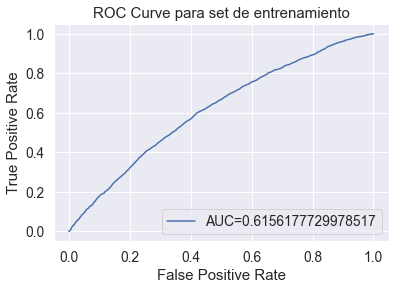

In [100]:
# Graficamos la curva ROC:
from sklearn.metrics import roc_curve, roc_auc_score

predictions_proba = rf.predict_proba(X_test)

fpr, tpr, t_values = roc_curve(y_test,  predictions_proba[:,1])
auc = roc_auc_score(y_test, predictions_proba[:,1])

plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para set de entrenamiento')
plt.legend(loc=4)
plt.show()

## GridSearch: SVC

In [68]:
# Separamos en los test objetivos:
X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)

# Ahora obtenemos los sets correctamente ordenados:
balance = 'SMOTE'  # Definimos una ténica de balanceo
n_splits = 1  # Ahora utilizaremos sólo un set de datos
train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)

# Para entrenar, definimos los values de los dataframes:
X_test = X_test_df.values
y_test = y_test_df['Readmisión'].values

y_train.loc[y_train['Readmisión']==1,'Readmisión'] = 0
y_train.loc[y_train['Readmisión']==2,'Readmisión'] = 1

_The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable_

-- Marc Shivers, 2012

In [69]:
# Definimos la función score para LR+

from sklearn.metrics import recall_score, make_scorer

def positive_lr(y, y_pred):
    sens = recall_score(y, y_pred)
    espc = recall_score(y, y_pred, pos_label=0)
    returned = sens/(1 - espc)
    return returned

In [70]:
# Realizamos un GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer
from sklearn.svm import LinearSVC

estimate = LinearSVC(max_iter=10000, penalty='l2')
search_space = {'class_weight': [{0: 0.25, 1: 0.75}, {0: 0.15, 1: 0.85}, {0: 0.1, 1: 0.9}, {0: 0.05, 1:0.95}],
                'C': [1, 1.5, 2]}
scored = {'sensitivity': make_scorer(recall_score),
          'specificity': make_scorer(recall_score,pos_label=0),
          'likelihood ratio': make_scorer(positive_lr)}
gs = GridSearchCV(estimator=estimate,
                  param_grid=search_space,
                  scoring=scored,
                  refit='specificity',
                  cv=5,
                  verbose=4)

In [90]:
gs.fit(X_train.values, y_train['Readmisión'].values)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=1, class_weight={0: 0.25, 1: 0.75}; sensitivity: (test=0.370) specificity: (test=0.757) total time=   4.0s
[CV 2/5] END C=1, class_weight={0: 0.25, 1: 0.75}; sensitivity: (test=0.384) specificity: (test=0.754) total time=   3.2s
[CV 3/5] END C=1, class_weight={0: 0.25, 1: 0.75}; sensitivity: (test=0.399) specificity: (test=0.751) total time=   2.8s
[CV 4/5] END C=1, class_weight={0: 0.25, 1: 0.75}; sensitivity: (test=0.408) specificity: (test=0.772) total time=   3.0s
[CV 5/5] END C=1, class_weight={0: 0.25, 1: 0.75}; sensitivity: (test=0.392) specificity: (test=0.755) total time=   2.9s
[CV 1/5] END C=1, class_weight={0: 0.15, 1: 0.85}; sensitivity: (test=0.841) specificity: (test=0.287) total time=   3.1s
[CV 2/5] END C=1, class_weight={0: 0.15, 1: 0.85}; sensitivity: (test=0.820) specificity: (test=0.295) total time=   3.1s
[CV 3/5] END C=1, class_weight={0: 0.15, 1: 0.85}; sensitivity: (test=0.877) specific

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [1, 1.5, 2],
                         'class_weight': [{0: 0.25, 1: 0.75},
                                          {0: 0.15, 1: 0.85}, {0: 0.1, 1: 0.9},
                                          {0: 0.05, 1: 0.95}]},
             refit='specificity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=4)

Podemos ver que los mejores resultados están en el class weight entre 0.25:0.75 - 0.15:0.85, por lo que realizamos lo mismo pero con ellos:

In [102]:
estimate = LinearSVC(max_iter=10000, penalty='l2')
search_space = {'class_weight': [{0: 0.25, 1: 0.75}, {0: 0.22, 1: 0.78}, {0: 0.28, 1: 0.72}, {0: 0.3, 1:0.7}],
                'C': [1, 2, 3, 4]}
scored = {'sensitivity': make_scorer(recall_score),
          'specificity': make_scorer(recall_score,pos_label=0),
          'likelihood ratio': make_scorer(positive_lr)}
gs = GridSearchCV(estimator=estimate,
                  param_grid=search_space,
                  scoring=scored,
                  refit='likelihood ratio',
                  cv=5,
                  verbose=4)

In [103]:
gs.fit(X_train.values, y_train['Readmisión'].values)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=1, class_weight={0: 0.25, 1: 0.75}; likelihood ratio: (test=1.527) sensitivity: (test=0.370) specificity: (test=0.757) total time=   3.5s
[CV 2/5] END C=1, class_weight={0: 0.25, 1: 0.75}; likelihood ratio: (test=1.560) sensitivity: (test=0.384) specificity: (test=0.754) total time=   2.8s
[CV 3/5] END C=1, class_weight={0: 0.25, 1: 0.75}; likelihood ratio: (test=1.602) sensitivity: (test=0.399) specificity: (test=0.751) total time=   2.6s
[CV 4/5] END C=1, class_weight={0: 0.25, 1: 0.75}; likelihood ratio: (test=1.783) sensitivity: (test=0.407) specificity: (test=0.772) total time=   2.7s
[CV 5/5] END C=1, class_weight={0: 0.25, 1: 0.75}; likelihood ratio: (test=1.602) sensitivity: (test=0.392) specificity: (test=0.755) total time=   4.1s
[CV 1/5] END C=1, class_weight={0: 0.22, 1: 0.78}; likelihood ratio: (test=1.382) sensitivity: (test=0.489) specificity: (test=0.646) total time=   2.7s
[CV 2/5] END C=1, cla

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [1, 2, 3, 4],
                         'class_weight': [{0: 0.25, 1: 0.75},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.28, 1: 0.72},
                                          {0: 0.3, 1: 0.7}]},
             refit='likelihood ratio',
             scoring={'likelihood ratio': make_scorer(positive_lr),
                      'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=4)

In [104]:
print(gs.best_estimator_)
print(gs.best_params_)

LinearSVC(C=1, class_weight={0: 0.3, 1: 0.7}, max_iter=10000)
{'C': 1, 'class_weight': {0: 0.3, 1: 0.7}}


De esta manera, los parámetros óptimos para SVM son:
* kernel = 'linear'
* class_weight = {0: 0.3, 1: 0.7}
* C = 1
* max_iter = 10000
* penalty = 'l2'

## GridSearch RF:

In [72]:
# Separamos en los test objetivos:
X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)

# Ahora obtenemos los sets correctamente ordenados:
balance = 'SMOTE'  # Definimos una ténica de balanceo
n_splits = 1  # Ahora utilizaremos sólo un set de datos
train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)

# Para entrenar, definimos los values de los dataframes:
X_test = X_test_df.values
y_test = y_test_df['Readmisión'].values

y_train.loc[y_train['Readmisión']==1,'Readmisión'] = 0
y_train.loc[y_train['Readmisión']==2,'Readmisión'] = 1

In [73]:
# Definimos la función score para LR+

from sklearn.metrics import recall_score, make_scorer

def positive_lr(y, y_pred):
    sens = recall_score(y, y_pred)
    espc = recall_score(y, y_pred, pos_label=0)
    returned = sens/(1 - espc)
    return returned

In [76]:
# Realizamos un GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

estimate = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7})
search_space = {'n_estimators': [500, 1000],
                'max_depth': [30, 50],
                'criterion': ['gini', 'entropy', 'log_loss']}
scored = {'sensitivity': make_scorer(recall_score),
          'specificity': make_scorer(recall_score,pos_label=0),
          'likelihood ratio': make_scorer(positive_lr)}
gs = GridSearchCV(estimator=estimate,
                  param_grid=search_space,
                  scoring=scored,
                  refit='specificity',
                  cv=5,
                  verbose=4)

In [77]:
gs.fit(X_train.values, y_train['Readmisión'].values)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=500; likelihood ratio: (test=2.044) sensitivity: (test=0.019) specificity: (test=0.991) total time=  25.8s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=500; likelihood ratio: (test=1.780) sensitivity: (test=0.013) specificity: (test=0.993) total time=  22.2s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=500; likelihood ratio: (test=2.252) sensitivity: (test=0.014) specificity: (test=0.994) total time=  20.5s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=500; likelihood ratio: (test=2.797) sensitivity: (test=0.012) specificity: (test=0.996) total time=  20.5s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=500; likelihood ratio: (test=2.491) sensitivity: (test=0.019) specificity: (test=0.993) total time=  22.4s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=1000; likelihood ratio: (test=1.708) sensitivity: (test=0.016) speci

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [30, 50], 'n_estimators': [500, 1000]},
             refit='specificity',
             scoring={'likelihood ratio': make_scorer(positive_lr),
                      'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=4)

In [78]:
print(gs.best_estimator_)
print(gs.best_params_)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=50,
                       n_estimators=500)
{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 500}


In [79]:
model = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight={0:0.3, 1:0.7}, max_depth=30)
model.fit(X_train.values, y_train['Readmisión'].values)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=30,
                       n_estimators=500)

In [80]:
# Predecimos y notamos metricas:
predictions = model.predict(X_test)

metrics = cross_validation(y_test, predictions)

metrics

{'Accuracy': 0.7920433996383364,
 'Error': 0.456022587556432,
 'Matriz de confusión': array([[9150,   65],
        [2350,   48]], dtype=int64),
 'Precisión': 0.9929462832338578,
 'Sensibilidad': 0.7956521739130434,
 'Especifidad': 0.4247787610619469,
 'Likelihood Ratio Positivo': 1.383210702341137,
 'Recall': 0.7956521739130434}

In [71]:
# Implementación del RF:
modelo1 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
modelo2 = LinearSVC(probability=True, class_weight='balanced')
rf = ModelImplementationEnsemble(modelo1, modelo2, modelo3, modelo4, modelo5)

# Entrenamos el ensamblaje:
rf.fit(train_list[0][0].values, train_list[0][1]['Readmisión'].values, verbose=1)

Modelo 1 Entrenado
Modelo 2 Entrenado
Modelo 3 Entrenado
Modelo 4 Entrenado
Modelo 5 Entrenado


In [73]:
# Predecimos y notamos metricas:
predictions = rf.predict_2(X_test)

metrics = cross_validation(y_test, predictions)

metrics

{'Accuracy': 0.78541289933695,
 'Error': 0.4632354699966854,
 'Matriz de confusión': array([[9054,   83],
        [2409,   67]], dtype=int64),
 'Precisión': 0.9909160555981176,
 'Sensibilidad': 0.7898455901596441,
 'Especifidad': 0.44666666666666666,
 'Likelihood Ratio Positivo': 1.4274317894451398,
 'Recall': 0.7898455901596441}

In [74]:
# Predecimos y notamos metricas:
predictions = rf.predict(X_test, threshold=0.765)

metrics = cross_validation(y_test, predictions)

metrics

{'Accuracy': 0.7867045552398174,
 'Error': 0.46183919794684225,
 'Matriz de confusión': array([[9129,    8],
        [2469,    7]], dtype=int64),
 'Precisión': 0.9991244390937944,
 'Sensibilidad': 0.7871184687015003,
 'Especifidad': 0.4666666666666667,
 'Likelihood Ratio Positivo': 1.475847128815313,
 'Recall': 0.7871184687015003}

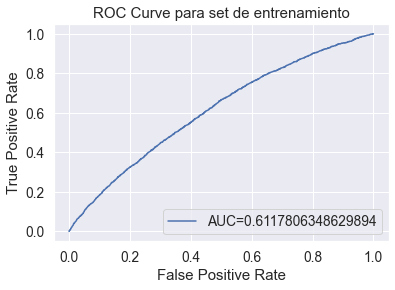

In [96]:
# Graficamos la curva ROC:
from sklearn.metrics import roc_curve, roc_auc_score

predictions_proba = rf.predict_proba(X_test)

fpr, tpr, t_values = roc_curve(y_test,  predictions_proba[:,1])
auc = roc_auc_score(y_test, predictions_proba[:,1])

plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve para set de entrenamiento')
plt.legend(loc=4)
plt.show()

## Tabla de regresión:

In [71]:
import statsmodels.api as sm

In [68]:
# Separamos en los test objetivos:
X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)

# Ahora obtenemos los sets correctamente ordenados:
balance = 'SMOTE'  # Definimos una ténica de balanceo
n_splits = 1  # Ahora utilizaremos sólo un set de datos
train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)

# Para entrenar, definimos los values de los dataframes:
X_test = X_test_df.values
y_test = y_test_df.values

In [111]:
# Definimos los sets de entrenamiento:
X_train_rl = train_list[0][0].loc[:,:].values
y_train_rl = train_list[0][1]['Readmisión'].values

X_train_rl = sm.add_constant(X_train_rl, prepend=True)

modelo = sm.Logit(endog=y_train_rl, exog=X_train_rl)
modelo = modelo.fit(method='bfgs')
print(modelo.summary())

         Current function value: 0.660503
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                42902
Model:                          Logit   Df Residuals:                    42738
Method:                           MLE   Df Model:                          163
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                 0.04710
Time:                        17:35:28   Log-Likelihood:                -28337.
converged:                      False   LL-Null:                       -29737.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0252      0.021      1.200      0.230      -0.016       0.0

c:\Users\nacho\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [128]:
# Guardamos la información por si acaso:
modelo.save("LogisticRegResults.pkl")

In [130]:
xlabel = list(df1.columns)
i_readmision = xlabel.index('Readmisión')
xlabel.pop(i_readmision)

reg_results = pd.DataFrame({'Estimation': modelo.params,
                            'Std Error':modelo.bse,
                            'p-Value':modelo.pvalues}, index=xlabel)
reg_results['95% Conf. Significance?'] = np.array(reg_results['p-Value'] < 0.05)
pd.set_option("display.max_rows", None, "display.max_columns", None)
reg_results

,Estimation,Std Error,p-Value,95% Conf. Significance?
sexo,0.025233,2.103472e-02,2.303078e-01,False
Tipo de Admisión,0.199866,2.680443e-02,8.887671e-14,True
Días de estancia en primer ingreso,0.243208,5.071279e-02,1.620349e-06,True
Tipo de alta,0.372116,2.564217e-02,1.019141e-47,True
Cantidad de procedimientos médicos,-0.318840,4.706085e-02,1.243571e-11,True
Visitas al Hospital,0.597637,3.260435e-02,4.771460e-75,True
Cantidad de diagnosticos,0.562869,7.285607e-02,1.111777e-14,True
Comorbilidades,-0.078751,3.927724e-02,4.496346e-02,True
Insulina_Baja,0.066560,4.218991e-02,1.146522e-01,False
Insulina_Estable,-0.032612,3.626900e-02,3.685634e-01,False


## 10 Iteraciones!

In [169]:
n_iter = 10
counter = 1
iteration_metrics = {}
while counter <= n_iter:
    # Separamos en los test objetivos:
    X_train, X_test, y_train, y_test = custom_train_test(df1, train_prop=0.7)
    
    # Ahora obtenemos los sets correctamente ordenados:
    balance = 'SMOTE'  # Definimos una ténica de balanceo
    n_splits = 4  # Definimos un total de splits para el set de datos
    train_list, X_test_df, y_test_df = get_train_test_list(X_train, X_test, y_train, y_test, balance=balance, n_splits=n_splits)
    
    # Para entrenar, definimos los values de los dataframes:
    X_test = X_test_df.values
    y_test = y_test_df.values
    
    # Implementación del RF:
    modelo1 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
    modelo2 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
    modelo3 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
    modelo4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", class_weight='balanced_subsample')
    
    rf = ModelImplementation(modelo1, modelo2, modelo3, modelo4)
    
    # Entrenamos el ensamblaje:
    rf.fit(train_list)

    # Predecimos y notamos metricas:
    predictions = rf.predict(X_test, threshold=0.765)
    metrics = cross_validation(y_test, predictions)
    iteration_metrics[f'Iteración {counter}'] = metrics
    print(f'Iteración {counter} terminada!')
    counter += 1

Iteración 1 terminada!
Iteración 2 terminada!
Iteración 3 terminada!
Iteración 4 terminada!
Iteración 5 terminada!
Iteración 6 terminada!
Iteración 7 terminada!
Iteración 8 terminada!
Iteración 9 terminada!
Iteración 10 terminada!


In [171]:
metric_summary(iteration_metrics).describe()

,Accuracy,Error,Precisión,Sensibilidad,Especifidad,Likelihood Ratio Positivo,Recall
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.791027,0.457123,0.999641,0.791214,0.369683,1.288224,0.791214
std,0.003282,0.003597,0.000116,0.003271,0.099966,0.235572,0.003271
min,0.786532,0.449844,0.999453,0.786748,0.250000,1.051942,0.786748
25%,0.789116,0.455834,0.999590,0.789284,0.297619,1.128497,0.789284
50%,0.790881,0.457295,0.999674,0.791006,0.366667,1.253538,0.791006
75%,0.792216,0.459221,0.999676,0.792487,0.421429,1.365029,0.792487
max,0.797641,0.462026,0.999782,0.797812,0.571429,1.845798,0.797812
